## Importing libraries 


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.src.metrics.accuracy_metrics import accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import label_binarize
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

## Dataset description

In [45]:
data = pd.read_csv('dataset/player_injuries_impact.csv', na_values=['N.A.'])
data.head()

,Name,Team Name,Position,Age,Season,FIFA rating,Injury,Date of Injury,Date of return,Match1_before_injury_Result,...,Match1_after_injury_GD,Match1_after_injury_Player_rating,Match2_after_injury_Result,Match2_after_injury_Opposition,Match2_after_injury_GD,Match2_after_injury_Player_rating,Match3_after_injury_Result,Match3_after_injury_Opposition,Match3_after_injury_GD,Match3_after_injury_Player_rating
0,Jamaal Lascelles,Newcastle,Center Back,26,2019/20,77,Knee injury,"Nov 9, 2019","Jan 13, 2020",draw,...,1.0,7.1,draw,Everton,0.0,6.2,draw,Norwich City,0.0,6.7
1,Fabian Schär,Newcastle,Center Back,28,2019/20,79,Knee injury,"Oct 20, 2019","Nov 24, 2019",lose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fabian Schär,Newcastle,Center Back,28,2019/20,79,Hamstring strain,"Jan 2, 2020","Jan 17, 2020",lose,...,0.0,6(S),lose,Arsenal,-4.0,NaN,lose,Crystal Palace,-1.0,6.5
3,Fabian Schär,Newcastle,Center Back,28,2019/20,79,Shoulder injury,"Jul 16, 2020","Sep 28, 2020",lose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paul Dummett,Newcastle,Center Back,28,2019/20,75,Groin injury,"Dec 22, 2019","Jan 10, 2020",win,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
data.tail()

,Name,Team Name,Position,Age,Season,FIFA rating,Injury,Date of Injury,Date of return,Match1_before_injury_Result,...,Match1_after_injury_GD,Match1_after_injury_Player_rating,Match2_after_injury_Result,Match2_after_injury_Opposition,Match2_after_injury_GD,Match2_after_injury_Player_rating,Match3_after_injury_Result,Match3_after_injury_Opposition,Match3_after_injury_GD,Match3_after_injury_Player_rating
651,James Garner,Everton,Defensive Midfielder,21,2022/23,72,back injury,"Nov 12, 2022","Feb 9, 2023",lose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652,Dwight McNeil,Everton,Left winger,23,2023/24,76,ankle injury,"July 29, 2023","Sep 1, 2023",NaN,...,0.0,6(S),lose,Arsenal,-1.0,5.4,win,Brentford,2.0,7.6
653,Ashley Young,Everton,Left Back,38,2023/24,75,muscle injury,"Dec 11, 2023","Jan 25, 2024",win,...,0.0,5.6,draw,Tottenham,0.0,6.3,lose,Man City,-2.0,5.2
654,Jack Harrison,Everton,Right winger,26,2023/24,76,hip injury,"Jul 1, 2023","Sep 21, 2023",NaN,...,-1.0,6.5(S),win,Bournemouth,3.0,8.5,lose,Liverpool,-2.0,5.4
655,Beto,Everton,Center Forward,25,2023/24,81,knee injury,"Nov 23, 2023","Nov 28, 2023",win,...,1.0,5.7,win,Chelsea,2.0,5.8,lose,Tottenham,-1.0,6(S)


In [47]:
print(len(data.columns))

42


In [48]:
print(len(data))

656


In [49]:
data.shape

(656, 42)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name                                656 non-null    object 
 1   Team Name                           656 non-null    object 
 2   Position                            656 non-null    object 
 3   Age                                 656 non-null    int64  
 4   Season                              656 non-null    object 
 5   FIFA rating                         656 non-null    int64  
 6   Injury                              656 non-null    object 
 7   Date of Injury                      656 non-null    object 
 8   Date of return                      656 non-null    object 
 9   Match1_before_injury_Result         591 non-null    object 
 10  Match1_before_injury_Opposition     591 non-null    object 
 11  Match1_before_injury_GD             591 non-n

### Correlation Check

In [51]:
input_features = ['Age', 'FIFA rating', 'Match1_before_injury_GD', 'Match1_missed_match_GD']
output_features = ['Match1_after_injury_GD']
selected_features = input_features + output_features
correlation_matrix = data[selected_features].corr()

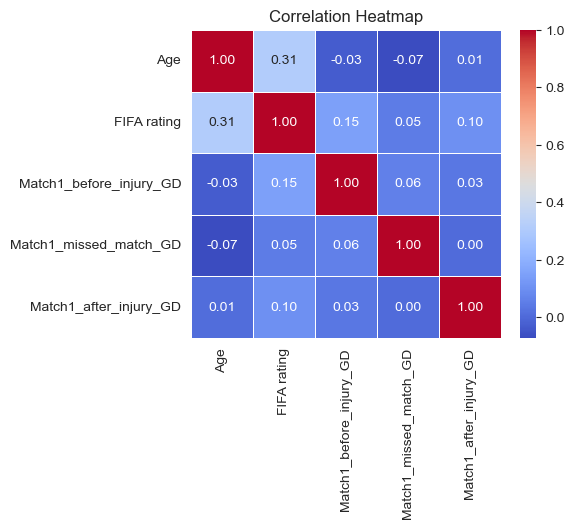

In [52]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Balance Check

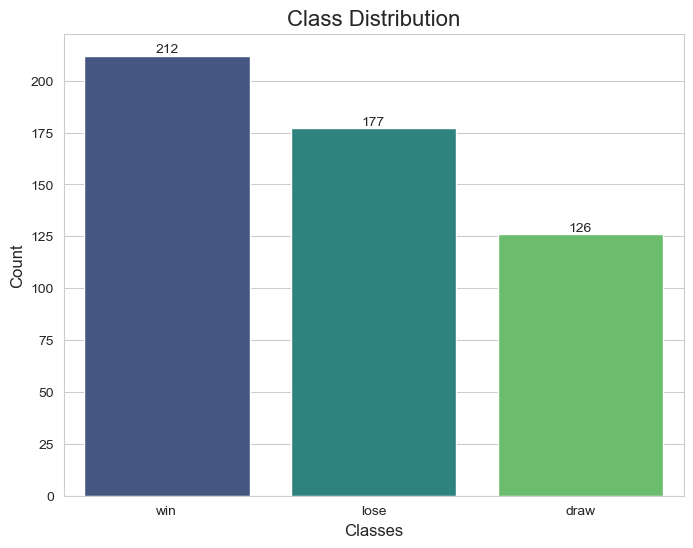

In [53]:
target_column = 'Match1_after_injury_Result'

class_counts = data[target_column].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis', hue=class_counts.index, legend=False)

plt.xlabel('Classes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Class Distribution', fontsize=16)

for i, count in enumerate(class_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

## Dataset pre-processing

In [54]:
data.isnull().sum()

Name                                    0
Team Name                               0
Position                                0
Age                                     0
Season                                  0
FIFA rating                             0
Injury                                  0
Date of Injury                          0
Date of return                          0
Match1_before_injury_Result            65
Match1_before_injury_Opposition        65
Match1_before_injury_GD                65
Match1_before_injury_Player_rating     67
Match2_before_injury_Result           101
Match2_before_injury_Opposition       101
Match2_before_injury_GD               101
Match2_before_injury_Player_rating    102
Match3_before_injury_Result           157
Match3_before_injury_Opposition       157
Match3_before_injury_GD               157
Match3_before_injury_Player_rating    157
Match1_missed_match_Result              2
Match1_missed_match_Opposition          2
Match1_missed_match_GD            

### Dropping unwanted columns


In [55]:
print("shape of dataframe before dropping:", data.shape)

data = data.drop(['Name', 'Match2_after_injury_Result', 'Match2_after_injury_Opposition', 'Match2_after_injury_GD',
                  'Match2_after_injury_Player_rating', 'Match3_after_injury_Result', 'Match3_after_injury_Opposition',
                  'Match3_after_injury_GD', 'Match3_after_injury_Player_rating', 'Match3_missed_match_Result',
                  'Match3_missed_match_Opposition', 'Match3_missed_match_GD', 'Match1_after_injury_GD',
                  'Match1_after_injury_Player_rating'], axis=1)
print("shape of dataframe after dropping:", data.shape)

shape of dataframe before dropping: (656, 42)
shape of dataframe after dropping: (656, 28)


### Dropping rows where target is None


In [56]:
print("shape of dataframe before dropping:", data.shape)

target_column = 'Match1_after_injury_Result'

data = data.dropna(subset=[target_column])

print("shape of dataframe after dropping:", data.shape)

shape of dataframe before dropping: (656, 28)
shape of dataframe after dropping: (515, 28)


### Encoding Categorical data

#### One Hot Encoding

In [57]:
data = pd.get_dummies(data, columns=['Team Name', 'Position', 'Season', 'Injury', 'Match1_before_injury_Opposition',
                                     'Match2_before_injury_Opposition', 'Match3_before_injury_Opposition',
                                     'Match1_after_injury_Opposition', 'Match1_missed_match_Opposition',
                                     'Match2_missed_match_Opposition'], drop_first=True)
print(data.shape)
data.head()

(515, 311)


,Age,FIFA rating,Date of Injury,Date of return,Match1_before_injury_Result,Match1_before_injury_GD,Match1_before_injury_Player_rating,Match2_before_injury_Result,Match2_before_injury_GD,Match2_before_injury_Player_rating,...,Match2_missed_match_Opposition_Newcastle,Match2_missed_match_Opposition_Norwich City,Match2_missed_match_Opposition_Nottm Forest,Match2_missed_match_Opposition_Sheffield,Match2_missed_match_Opposition_Southampton,Match2_missed_match_Opposition_Tottenham,Match2_missed_match_Opposition_Watford,Match2_missed_match_Opposition_West Brom,Match2_missed_match_Opposition_West Ham,Match2_missed_match_Opposition_Wolves
0,26,77,"Nov 9, 2019","Jan 13, 2020",draw,0.0,7.4,win,1.0,6.1,...,False,False,False,False,False,False,False,False,False,False
2,28,79,"Jan 2, 2020","Jan 17, 2020",lose,-3.0,4.9,lose,-1.0,7.7,...,False,False,False,False,False,False,False,False,False,False
5,30,75,"Dec 9, 2019","Jan 10, 2020",draw,0.0,6,win,2.0,6.4,...,False,False,False,False,False,False,False,False,False,False
7,26,77,"Sep 22, 2019","Oct 5, 2019",draw,0.0,6.7,lose,-2.0,6.5,...,False,False,False,False,False,False,False,False,False,False
8,26,77,"Dec 15, 2019","Dec 25, 2019",win,2.0,6,win,-1.0,5.8,...,False,False,False,False,False,False,False,False,False,False


#### Label Encoding

In [58]:
data['Match1_before_injury_Result'].unique()

array(['draw', 'lose', 'win', nan], dtype=object)

In [59]:
mappings = {'Match1_before_injury_Result': {'draw': 1, 'lose': 0, 'win': 2},
            'Match2_before_injury_Result': {'draw': 1, 'lose': 0, 'win': 2},
            'Match3_before_injury_Result': {'draw': 1, 'lose': 0, 'win': 2},
            'Match1_after_injury_Result': {'draw': 1, 'lose': 0, 'win': 2},
            'Match1_missed_match_Result': {'draw': 1, 'lose': 0, 'win': 2},
            'Match2_missed_match_Result': {'draw': 1, 'lose': 0, 'win': 2}}

for column, mapping in mappings.items():
    data[column] = data[column].map(mapping)

data.head()

,Age,FIFA rating,Date of Injury,Date of return,Match1_before_injury_Result,Match1_before_injury_GD,Match1_before_injury_Player_rating,Match2_before_injury_Result,Match2_before_injury_GD,Match2_before_injury_Player_rating,...,Match2_missed_match_Opposition_Newcastle,Match2_missed_match_Opposition_Norwich City,Match2_missed_match_Opposition_Nottm Forest,Match2_missed_match_Opposition_Sheffield,Match2_missed_match_Opposition_Southampton,Match2_missed_match_Opposition_Tottenham,Match2_missed_match_Opposition_Watford,Match2_missed_match_Opposition_West Brom,Match2_missed_match_Opposition_West Ham,Match2_missed_match_Opposition_Wolves
0,26,77,"Nov 9, 2019","Jan 13, 2020",1.0,0.0,7.4,2.0,1.0,6.1,...,False,False,False,False,False,False,False,False,False,False
2,28,79,"Jan 2, 2020","Jan 17, 2020",0.0,-3.0,4.9,0.0,-1.0,7.7,...,False,False,False,False,False,False,False,False,False,False
5,30,75,"Dec 9, 2019","Jan 10, 2020",1.0,0.0,6,2.0,2.0,6.4,...,False,False,False,False,False,False,False,False,False,False
7,26,77,"Sep 22, 2019","Oct 5, 2019",1.0,0.0,6.7,0.0,-2.0,6.5,...,False,False,False,False,False,False,False,False,False,False
8,26,77,"Dec 15, 2019","Dec 25, 2019",2.0,2.0,6,2.0,-1.0,5.8,...,False,False,False,False,False,False,False,False,False,False


### Converting rating objects to numerics

In [60]:
data['Match1_before_injury_Player_rating'] = pd.to_numeric(data['Match1_before_injury_Player_rating'], errors='coerce')
data['Match2_before_injury_Player_rating'] = pd.to_numeric(data['Match2_before_injury_Player_rating'], errors='coerce')
data['Match3_before_injury_Player_rating'] = pd.to_numeric(data['Match3_before_injury_Player_rating'], errors='coerce')

### DateTime

In [61]:
datetime_columns = ['Date of Injury', 'Date of return']

for col in datetime_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')
    data[col] = data[col].apply(lambda row: row.month)

data.head()

,Age,FIFA rating,Date of Injury,Date of return,Match1_before_injury_Result,Match1_before_injury_GD,Match1_before_injury_Player_rating,Match2_before_injury_Result,Match2_before_injury_GD,Match2_before_injury_Player_rating,...,Match2_missed_match_Opposition_Newcastle,Match2_missed_match_Opposition_Norwich City,Match2_missed_match_Opposition_Nottm Forest,Match2_missed_match_Opposition_Sheffield,Match2_missed_match_Opposition_Southampton,Match2_missed_match_Opposition_Tottenham,Match2_missed_match_Opposition_Watford,Match2_missed_match_Opposition_West Brom,Match2_missed_match_Opposition_West Ham,Match2_missed_match_Opposition_Wolves
0,26,77,11.0,1.0,1.0,0.0,7.4,2.0,1.0,6.1,...,False,False,False,False,False,False,False,False,False,False
2,28,79,1.0,1.0,0.0,-3.0,4.9,0.0,-1.0,7.7,...,False,False,False,False,False,False,False,False,False,False
5,30,75,12.0,1.0,1.0,0.0,6.0,2.0,2.0,6.4,...,False,False,False,False,False,False,False,False,False,False
7,26,77,9.0,10.0,1.0,0.0,6.7,0.0,-2.0,6.5,...,False,False,False,False,False,False,False,False,False,False
8,26,77,12.0,12.0,2.0,2.0,6.0,2.0,-1.0,5.8,...,False,False,False,False,False,False,False,False,False,False


In [62]:
data.shape

(515, 311)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, 0 to 655
Columns: 311 entries, Age to Match2_missed_match_Opposition_Wolves
dtypes: bool(293), float64(15), int64(3)
memory usage: 223.8 KB


## Feature scaling

In [64]:
# no scaling required

## Dataset splitting

In [65]:
from sklearn.model_selection import train_test_split

target_column = 'Match1_after_injury_Result'

x = data.drop(target_column, axis=1).fillna(0)
y = data[target_column]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [66]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 44 to 617
Columns: 310 entries, Age to Match2_missed_match_Opposition_Wolves
dtypes: bool(293), float64(15), int64(2)
memory usage: 153.6 KB


In [67]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 559 to 538
Columns: 310 entries, Age to Match2_missed_match_Opposition_Wolves
dtypes: bool(293), float64(15), int64(2)
memory usage: 66.1 KB


In [68]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 360 entries, 44 to 617
Series name: Match1_after_injury_Result
Non-Null Count  Dtype
--------------  -----
360 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [69]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 155 entries, 559 to 538
Series name: Match1_after_injury_Result
Non-Null Count  Dtype
--------------  -----
155 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB


## Model training & Testing

### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(random_state=42)
model_decision_tree.fit(x_train, y_train)

y_pred_Decision_Tree = model_decision_tree.predict(x_test)

accuracy_Decision_Tree = model_decision_tree.score(x_test, y_test)
accuracy_Decision_Tree = round(accuracy_Decision_Tree, 2)
print(accuracy_Decision_Tree)

0.42


### Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(random_state=42)
model_random_forest.fit(x_train, y_train)

y_pred_Random_Forest = model_random_forest.predict(x_test)

accuracy_Random_Forest = model_random_forest.score(x_test, y_test)
accuracy_Random_Forest = round(accuracy_Random_Forest, 2)
print(accuracy_Random_Forest)

0.5


### Hist Gradient Boosting Classifier

In [72]:
from sklearn.ensemble import HistGradientBoostingClassifier

model_HistGradientBoostingClassifier = HistGradientBoostingClassifier(random_state=42)
model_HistGradientBoostingClassifier.fit(x_train, y_train)

y_pred_HistGradientBoostingClassifier = model_HistGradientBoostingClassifier.predict(x_test)

accuracy_HistGradientBoostingClassifier = model_HistGradientBoostingClassifier.score(x_test, y_test)
accuracy_HistGradientBoostingClassifier = round(accuracy_HistGradientBoostingClassifier, 2)
print(accuracy_HistGradientBoostingClassifier)

0.52


### KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

modelKNeighborsClassifier = KNeighborsClassifier(n_neighbors=8)
modelKNeighborsClassifier.fit(x_train, y_train)

y_pred_KNeighborsClassifier = modelKNeighborsClassifier.predict(x_test)
accuracy_KNeighborsClassifier = modelKNeighborsClassifier.score(x_test, y_test)
accuracy_KNeighborsClassifier = round(accuracy_KNeighborsClassifier, 2)
print(accuracy_KNeighborsClassifier)

0.39


### Tensorflow

In [74]:
print(tf.__version__)

2.18.0


In [75]:
num_classes = len(np.unique(y))

if num_classes > 2:
    y_train_NN = tf.keras.utils.to_categorical(y_train, num_classes)
    y_test_NN = tf.keras.utils.to_categorical(y_test, num_classes)

model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')
])

In [76]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
    metrics=['accuracy']
)

In [77]:
history = model.fit(
    x_train,
    y_train_NN,
    epochs=50,
    batch_size=32,
    validation_split=0.3
)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4256 - loss: 3.9210 - val_accuracy: 0.3211 - val_loss: 2.4039
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3709 - loss: 1.5629 - val_accuracy: 0.2752 - val_loss: 1.2911
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4236 - loss: 1.2771 - val_accuracy: 0.3945 - val_loss: 1.2674
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4460 - loss: 1.0658 - val_accuracy: 0.3119 - val_loss: 1.2777
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3772 - loss: 1.1046 - val_accuracy: 0.3578 - val_loss: 1.1559
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4530 - loss: 1.0320 - val_accuracy: 0.3486 - val_loss: 1.1368
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5562 - loss: 0.9668 - val_accuracy: 0.3486 - val_loss: 1.1695
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6136 - loss: 0.9372 - val_accuracy: 0.3578 - val_loss: 1.1352
Epoch 9

In [78]:
test_loss, test_accuracy_NN = model.evaluate(x_test, y_test_NN)
test_accuracy_NN = round(test_accuracy_NN, 2)
print(f"Test Accuracy: {test_accuracy_NN}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4708 - loss: 1.2395 
Test Accuracy: 0.47


In [79]:
y_pred_NN = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


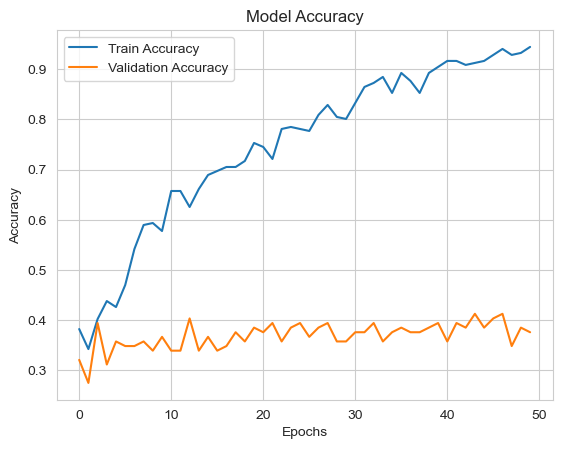

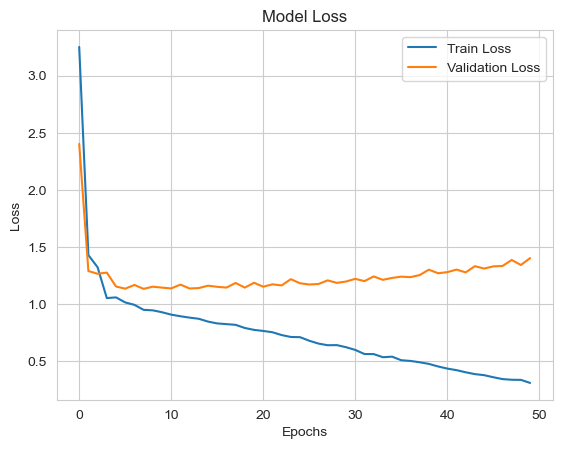

In [80]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

## Model selection/Comparison analysis

### Prediction accuracy of all models

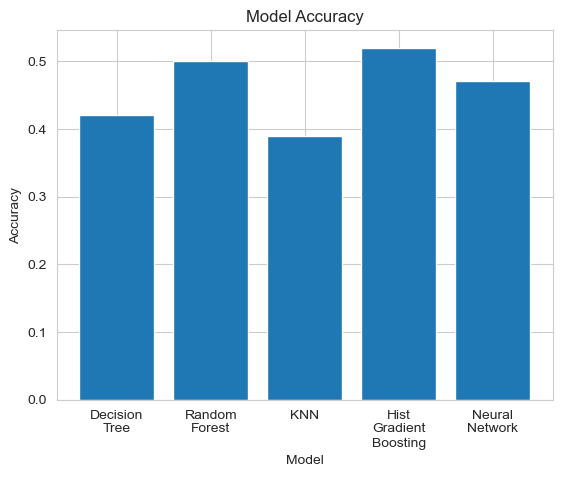

In [81]:
models = ['Decision\nTree', 'Random\nForest', 'KNN', 'Hist\nGradient\nBoosting', 'Neural\nNetwork']
accuracies = [accuracy_Decision_Tree, accuracy_Random_Forest, accuracy_KNeighborsClassifier,
              accuracy_HistGradientBoostingClassifier, test_accuracy_NN]

plt.bar(models, accuracies, tick_label=models)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

### Precision, recall comparison

#### Decision Tree

In [82]:
report_decision_tree = classification_report(y_test, y_pred_Decision_Tree)
print(report_decision_tree)

              precision    recall  f1-score   support

           0       0.39      0.45      0.42        53
           1       0.35      0.29      0.32        38
           2       0.48      0.47      0.48        64

    accuracy                           0.42       155
   macro avg       0.41      0.40      0.40       155
weighted avg       0.42      0.42      0.42       155



#### Random Forest

In [83]:
report_random_forest = classification_report(y_test, y_pred_Random_Forest)
print(report_random_forest)

              precision    recall  f1-score   support

           0       0.49      0.49      0.49        53
           1       0.67      0.16      0.26        38
           2       0.49      0.72      0.59        64

    accuracy                           0.50       155
   macro avg       0.55      0.46      0.44       155
weighted avg       0.54      0.50      0.47       155



#### KNN

In [84]:
report_KNeighborsClassifier = classification_report(y_test, y_pred_KNeighborsClassifier)
print(report_KNeighborsClassifier)

              precision    recall  f1-score   support

           0       0.38      0.58      0.46        53
           1       0.35      0.18      0.24        38
           2       0.43      0.36      0.39        64

    accuracy                           0.39       155
   macro avg       0.39      0.38      0.36       155
weighted avg       0.39      0.39      0.38       155



#### Hist Gradient Boosting

In [85]:
report_HistGradientBoostingClassifier = classification_report(y_test, y_pred_HistGradientBoostingClassifier)
print(report_HistGradientBoostingClassifier)

              precision    recall  f1-score   support

           0       0.48      0.51      0.50        53
           1       0.48      0.39      0.43        38
           2       0.56      0.59      0.58        64

    accuracy                           0.52       155
   macro avg       0.51      0.50      0.50       155
weighted avg       0.51      0.52      0.51       155



#### Neural Network

In [86]:
y_pred_prob = model.predict(x_test)
if num_classes > 2:
    y_pred_class = np.argmax(y_pred_prob, axis=1)
    y_test_class = np.argmax(y_test_NN, axis=1)
else:
    y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()
    y_test_class = y_test.flatten()

report_NN = classification_report(y_test_class, y_pred_class)
print(report)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


NameError: name 'report' is not defined

### Confusion Matrix

#### Decision Tree

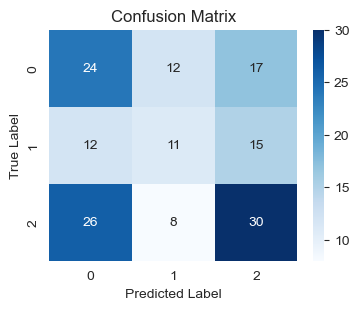

In [1585]:
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_Decision_Tree)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Random Forest

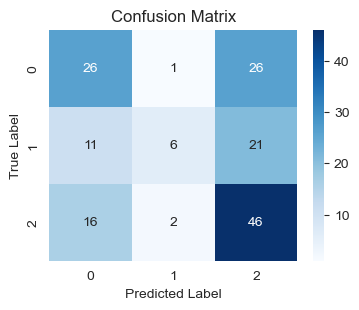

In [1586]:
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_Random_Forest)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_random_forest, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### KNN

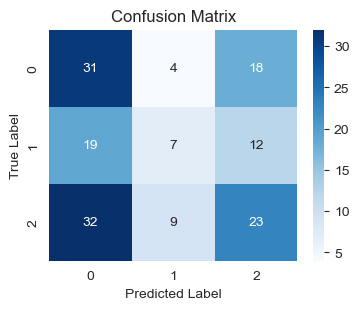

In [1587]:
conf_matrix_KNeighborsClassifier = confusion_matrix(y_test, y_pred_KNeighborsClassifier)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_KNeighborsClassifier, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Hist Gradient Boosting

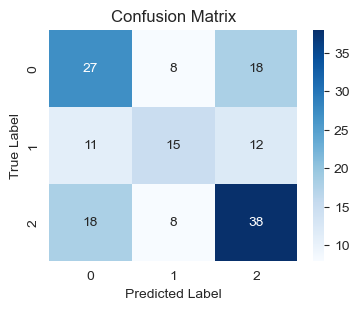

In [1588]:
conf_matrix_hist_gradient_boosting = confusion_matrix(y_test, y_pred_HistGradientBoostingClassifier)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_hist_gradient_boosting, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Neural Network

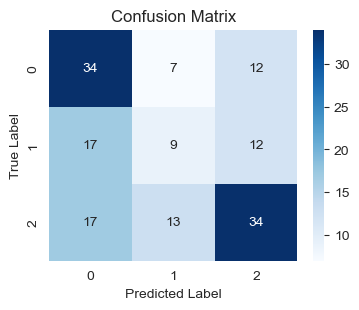

In [1589]:
conf_matrix_NN = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_NN, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()